In [1]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import pickle
from matplotlib import ticker
from scipy.stats import sem
from scipy.io import loadmat
from RZutilpy.figure import bar, plot, default_img_set, colorpalettable
from scipy.stats import ttest_rel
default_img_set()


In [2]:
with open('../Results/ACC_curve.pkl', 'rb') as f:
    ACC_curve = pickle.load(f)
TvN = loadmat('../Results/TvN.mat')

In [3]:
TvN_Pre = TvN["TvN_Pre"]
TvN_Post = TvN["TvN_Post"]
Contrast_Noise_Pre = ACC_curve["ACC_pre"].mean(axis=1)
Contrast_Noise_Post = ACC_curve["ACC_post"].mean(axis=1)
contrast_levels = [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0]
noise_levels = [0.005, 1, 5, 10, 15, 30, 50, 75]

In [4]:
Contrast_Noise_Pre_mean = Contrast_Noise_Pre.mean(axis=0)
Contrast_Noise_Pre_se = sem(Contrast_Noise_Pre, axis=0)
Contrast_Noise_Post_mean = Contrast_Noise_Post.mean(axis=0)
Contrast_Noise_Post_se = sem(Contrast_Noise_Post, axis=0)
TvN_mean = np.vstack((TvN_Pre.mean(axis=1),TvN_Post.mean(axis=1))).T
TvN_se = np.vstack((sem(TvN_Pre,axis=1),sem(TvN_Post,axis=1))).T
Noise_PNAS = np.array([ 0.        ,  0.1070829 ,  0.15053804,  0.21164231,  0.29752855,
                        0.41829713,  0.58808639,  0.82673679,  1.16231411,  1.61205392,
                        2.23596871,  3.10157282,  3.88603798,  4.30287223,  5.10743876,
                        5.81105456,  6.4455345 ,  7.5344385 ,  8.02443602,  8.87901722,
                        9.72231582,  11.05325977, 12.44418636, 13.34567157, 15.04695856,
                        17.77773966, 20.9619351 , 23.58013381, 24.71645617, 26.95722338,
                        29.14143467, 31.78556879])
TvC_Pre_PNAS = np.array([   1.99183756,  1.99183756,  1.99183756,  1.99183756,  1.99183756,
                            1.99183756,  1.99197563,  2.00638713,  2.02090289,  2.05096092,
                            2.12667562,  2.24419805,  2.40044187,  2.49026625,  2.6732597 ,
                            2.86056475,  3.04195751,  3.34452192,  3.48630793,  3.76304359,
                            4.05358951,  4.49992202,  4.95573828,  5.25212044,  5.81992273,
                            6.74771949,  7.90190225,  8.85136527,  9.25350547, 10.02478923,
                            10.75846242, 11.64145921])
TvC_Post_PNAS = np.array([  0.87254413, 0.87254413, 0.87254413, 0.87254413, 0.87254413,
                            0.87254413, 0.87873496, 0.87879587, 0.88515376, 0.89149586,
                            0.90437938, 0.93077218, 0.96006234, 0.97867381, 1.02221594,
                            1.06673365, 1.11018492, 1.18797131, 1.22459101, 1.29486348,
                            1.36698745, 1.48400916, 1.6139546 , 1.70090198, 1.86723046,
                            2.14117097, 2.46109441, 2.73643957, 2.85937532, 3.10824451,
                            3.34962595, 3.63990299])

In [5]:
# To create the half errorbars
Contrast_Noise_Pre_se = np.stack((Contrast_Noise_Pre_se,np.zeros_like(Contrast_Noise_Pre_se)),axis=2)
Contrast_Noise_Post_se = np.stack((Contrast_Noise_Post_se,np.zeros_like(Contrast_Noise_Post_se)),axis=2)
TvN_se = np.stack((TvN_se,np.zeros_like(TvN_se)),axis=2)
noise_levels = np.vstack((noise_levels,noise_levels)).T

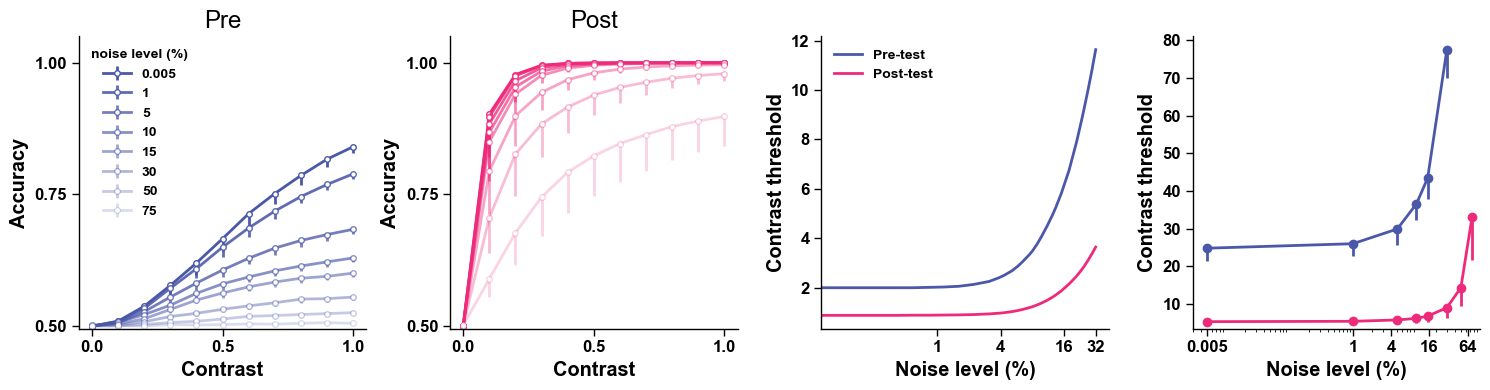

In [6]:
fig, ax = plt.subplots(1, 4, figsize=(15, 4))

# define color
colorlist = colorpalettable('ryz1')
alpha1 = np.linspace(1, 0.2, 8)
#C0_tmp=colors.to_rgba('C0')
C0_tmp = colorlist(0)
C0=[(C0_tmp[0], C0_tmp[1], C0_tmp[2], i) for i in alpha1]
#C1_tmp=colors.to_rgba('C1')
C1_tmp=colorlist(1)
C1=[(C1_tmp[0], C1_tmp[1], C1_tmp[2], i) for i in alpha1]

plt.sca(ax[0])
plot(contrast_levels, Contrast_Noise_Pre_mean, yerr=Contrast_Noise_Pre_se,
    label=['0.005', '1', '5', '10', '15', '30', '50', '75'], fmt='-o', color=C0, markerfacecolor='w', markersize=4,markeredgecolor=C0)
ax[0].set_xlabel('Contrast')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Pre')
ax[0].set_ylim([0.495,1.05])
ax[0].set_yticks([0.50,0.75,1.00])
ax[0].set_xticks([0,0.5,1.0])
ax[0].xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.1f}"))
ax[0].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
ax[0].legend(title="noise level (%)")

plt.sca(ax[1])
plot(contrast_levels, Contrast_Noise_Post_mean, yerr=Contrast_Noise_Post_se,
    label=['0.005', '1', '5', '10', '15', '30', '50', '75'], fmt='-o', color=C1, markerfacecolor='w', markersize=4,markeredgecolor=C1)
ax[1].set_xlabel('Contrast')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Post')
ax[1].set_ylim([0.495,1.05])
ax[1].set_yticks([0.50,0.75,1.00])
ax[1].set_xticks([0,0.5,1.0])
ax[1].xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.1f}"))
ax[1].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))

plt.sca(ax[2])
plot(Noise_PNAS, TvC_Pre_PNAS, label='Pre-test', fmt='-',c=colorlist(0))
plot(Noise_PNAS, TvC_Post_PNAS, label='Post-test', fmt='-', c=colorlist(1))
ax[2].set_yscale('linear')
ax[2].set_xscale('log')
ax[2].legend()
ax[2].set_xticks([1,4,16,32])
ax[2].set_xticklabels(["1","4","16","32"])
ax[2].minorticks_off()
ax[2].set_xlabel('Noise level (%)')
ax[2].set_ylabel('Contrast threshold')

plt.sca(ax[3])
plot(noise_levels, TvN_mean*100, yerr=TvN_se*100,
    label=['Pre-test', 'Post-test'], fmt='-o', c=[colorlist(0),colorlist(1)])
ax[3].set_yscale('linear')
ax[3].set_xscale('log')
ax[3].set_ylim([3.5,81])
ax[3].set_xlim([0.003,100]);
ax[3].set_xticks([0.005,1,4,16,64])
ax[3].set_xticklabels(["0.005","1","4","16","64"])
ax[3].set_xlabel('Noise level (%)')
ax[3].set_ylabel('Contrast threshold')

plt.savefig('Fig1_1.pdf')